In [9]:
import h5py

# f = h5py.File('/data/softec-lagrangian-nowcasting/outputs/mfunet-regularizedRMSE/mfunet-regularizedRMSE.h5', 'r')
# f = h5py.File('/data/softec-lagrangian-nowcasting/outputs/mfunet-grayscale-01/epoch_19/mfunet_rmse.h5', 'r')
# f = h5py.File('/data/softec-lagrangian-nowcasting/outputs/reg_mse_fix/reg_mse_fix_v3.h5', 'r')
# f = h5py.File('/data/softec-lagrangian-nowcasting/outputs/lagrangian/lcnn-bugfix_v2/lcnn-bugfix.h5', 'r')
# f = h5py.File('/data/softec-lagrangian-nowcasting/outputs/LUMIN/LUMIN-frozen.h5', 'r')
f = h5py.File('/data/softec-lagrangian-nowcasting/outputs/RainNet/RainNet-iterative.h5', 'r')

In [6]:
from datamodules import SHMUDataModule
from pathlib import Path
from utils.config import load_config

confpath = Path("") / "configs/MFUNET_train_conf"
dsconf = load_config(confpath / "datasets.yaml")
modelconf = load_config(confpath / "MFUNET.yaml")

dsconf.SHMUDataset.transform_to_grayscale = True

datamodule = SHMUDataModule(dsconf, modelconf.train_params)
datamodule.setup("test")
dataset = datamodule.test_dataset

In [7]:
import numpy as np

arr = np.zeros((12, 336, 336))

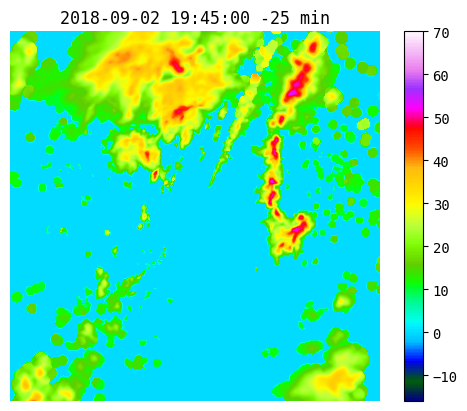

In [8]:
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animate
from IPython.display import HTML

plt.rcParams["font.family"] = "monospace"

sample_idx = random.randrange(len(dataset))
sample_idx = 35
sample_key = dataset.get_common_time(sample_idx).strftime("%Y-%m-%d %H:%M:%S")

x, y, idx = dataset[sample_idx]

for i in range(0, 6):
    arr[i] = dataset.from_grayscale(np.array(x[i][0]))
    arr[i][arr[i] < 10] = 0

for i in range(0, 6):
    arr[i+6] = np.array(f[sample_key]['model'][f'{i+1}']['data'])
    arr[i+6][arr[i+6] < 64] = 64
    arr[i+6] = arr[i+6] / 2 - 32
    arr[i+6][arr[i+6] < 10] = 0 # L-CNN fix

fig, ax = plt.subplots()

plt.imshow(arr[0], cmap='gist_ncar', vmin=-16, vmax=70)
cbar = plt.colorbar()

def update(frame):
    plt.imshow(arr[frame], cmap='gist_ncar', vmin=-16, vmax=70)
    plt.axis('off')
    plt.title(f"{sample_key}{(frame-5)*5:+4d} min")

ani = animate.FuncAnimation(fig=fig, func=update, frames=12)
HTML(ani.to_jshtml())

In [31]:
arr[-1][210:220,200:210]

array([[ 82.,  81.,  80.,  79.,  79.,  79.,  81.,  82.,  82.,  81.],
       [ 81.,  80.,  80.,  80.,  79.,  79.,  81.,  82.,  82.,  82.],
       [ 79.,  78.,  79.,  79.,  78.,  79.,  81.,  80.,  81.,  81.],
       [ 77.,  77.,  78.,  78.,  77.,  77.,  78.,  78.,  80.,  81.],
       [ 73.,  74.,  78.,  77.,  76.,  74.,  74.,  77.,  79.,  81.],
       [ 64.,  69.,  75.,  76.,  72.,  70.,  64.,  74.,  78.,  80.],
       [ 64.,  64.,  70.,  73.,  68.,  64.,  64.,  68.,  73.,  78.],
       [255., 255.,  64.,  69.,  64.,  64., 255.,  64.,  71.,  76.],
       [255., 255., 255.,  64.,  64., 255., 255.,  64.,  71.,  78.],
       [ 64., 255., 255.,  64., 255., 255., 255.,  64.,  72.,  79.]])

In [9]:
255 / 2 - 32

95.5

In [49]:
arr[-1]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [15., 15., 15., ...,  0.,  0.,  0.],
       [15., 15., 15., ...,  0.,  0.,  0.],
       [15., 15., 15., ...,  0.,  0.,  0.]])

In [245]:
f[sample_key].keys()

<KeysViewHDF5 ['mfunet-regularizedRMSE']>

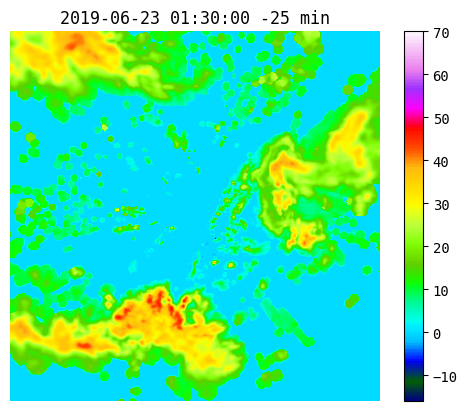

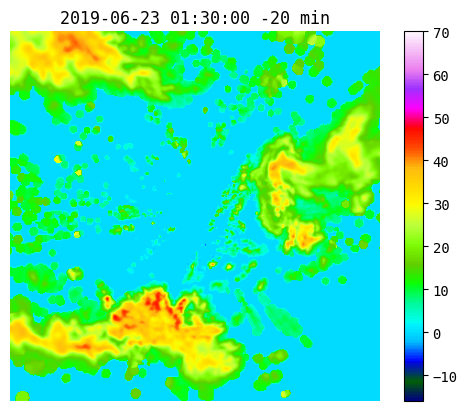

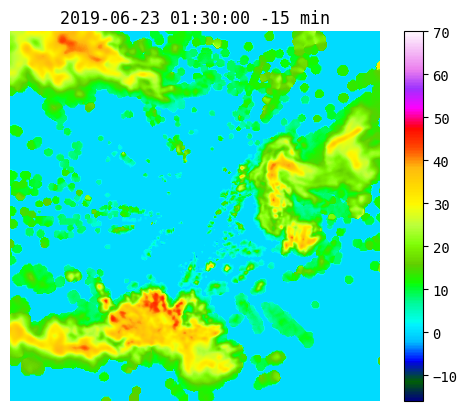

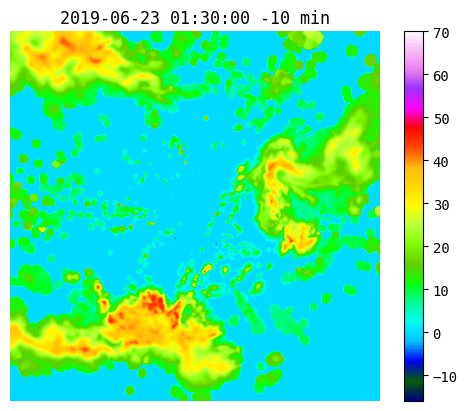

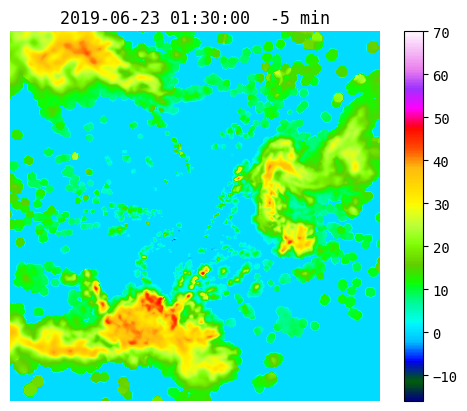

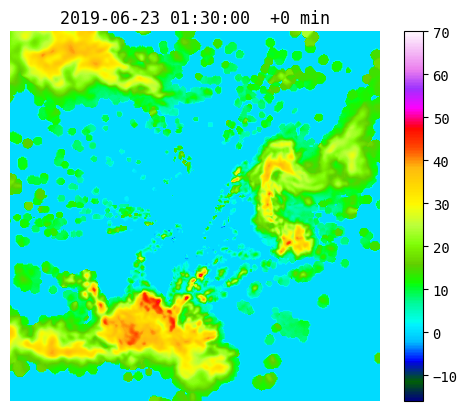

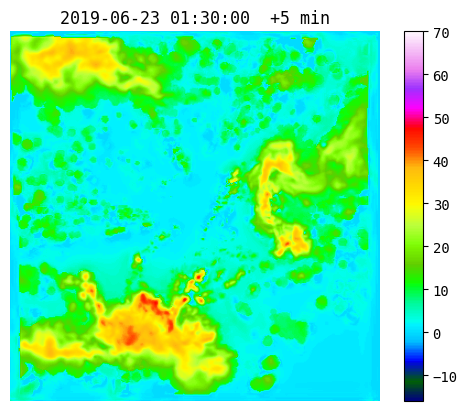

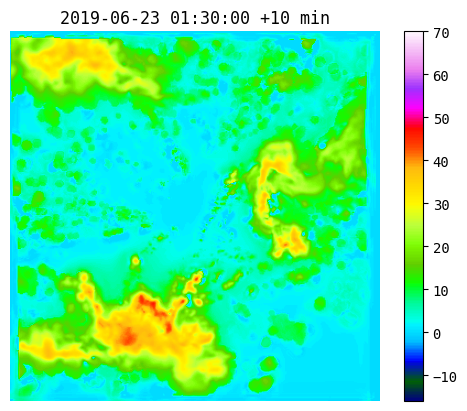

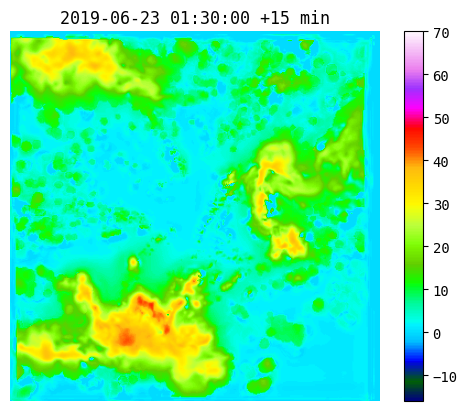

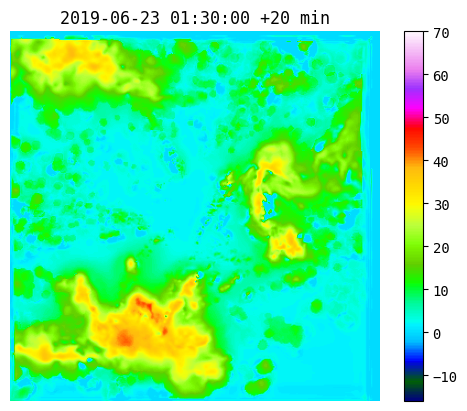

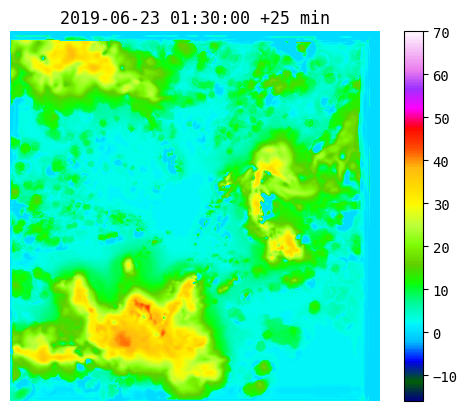

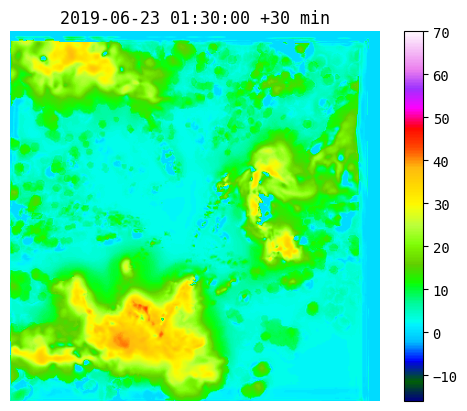

In [80]:
for i in range(len(arr)):
    plt.imshow(arr[i], cmap='gist_ncar', vmin=-16, vmax=70)
    plt.axis('off')
    cbar = plt.colorbar()
    plt.title(f"{sample_key}{(i-5)*5:+4d} min")
    plt.show()